# Project 1 - Stress on a floating wind turbine

**Project deadline:** This project is due for submission on **Friday, 10.05.2024, 11:55pm**. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice to work either on this project or on the second project. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out five projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects needs to be submitted by uploading a modified version of this notebook to [Projects/Project 1](https://ecampus.uni-bonn.de/goto_ecampus_exc_3381147.html) on eCampus. Please only upload this notebook and no other files. You also do not need to change its filename before your upload. Your project must be on eCampus by Friday, 10.05.2024, 11:55pm. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Thomas and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

**Important:** Your notebook will be tested and graded from a *clean* state `(Kernel -> Reset Kernel and clear all Outputs)`. Please make sure that it cleanly runs from *top to bottom*!

### Your Name here please: Syed Ahmed Mazhar

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, the conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain height, as the price and complexity of the foundation scales with the water depth. According to Wikipedia, fixed foundations can be installed at sea depth up to around 50 m.

This limits the possible wind farm locations to very few areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project you will work with simulated data measured for a floating foundation with a with a 15 MW wind turbine. For comparison, the standard offshore wind turbine is certified for on the order of 8 MW. Wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will consider data from simulations of a floating 15 MW offshore turbine in operation. The data contains the values shown in this figure as a function of time. 


<img src="figs/windTurbinePicture1.png" width="400" height="200" />








## Necessary Python packages

In [2]:
pip install mplcyberpunk

  Using cached mplcyberpunk-0.7.1-py3-none-any.whl.metadata (546 bytes)
Using cached mplcyberpunk-0.7.1-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# use mplcyberpunk because looks cooler and it was mentioned in the Lecture that it comes with bonuspoints
import mplcyberpunk
plt.style.use("cyberpunk")



# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. 
import pandas as pd


# module to make avilable data structures and routines
# for numerics
import numpy as np


# Loading the data
One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. 

You need to download the file "Orcaflex Simulation of 15 MW floating offshore wind turbine.csv" from the github. 

In [4]:
filename = "data/Orcaflex_Simulation_15_MW_wind_turbine.csv"

data = pd.read_csv(filename, # Here we load the file
                   delimiter=';') # Delimiter tells how the rows are separated
data # print a preview of the data

,Orcaflex Simulation of 15 MW floating offshore wind turbine,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
2,(s),(m/s),(m),(kN),(deg.),(m/s2),(kNm)
3,0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
4,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.1
...,...,...,...,...,...,...,...
35999,3599.6,52.96,0.39,5494.01,-4,-0.23,-518214.75
36000,3599.7,53.64,0.3,5510.76,-4,-0.21,-516202.25
36001,3599.8,54.17,0.21,5525.76,-4,-0.19,-514701.78
36002,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


The data does not look as we want it to. The first line includes the name of the data, and the header is only in line 1. Therefore, we need to exclude the first few rows. 

The ```header``` argument tells the function which row contains the headers of the columns. The ```skiprows``` tells the function if some rows should be skipped. We will skip the row containing the units for now.

In [5]:
data= pd.read_csv(filename, delimiter = ';', skiprows=[3],header= 2)
data

,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
0,0.0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
1,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.10
2,0.2,33.66,0.11,7475.07,-5.53,-1.24,-806385.89
3,0.3,34.23,-0.06,7489.50,-5.51,-1.23,-805549.79
4,0.4,34.95,-0.22,7500.62,-5.49,-1.21,-804060.69
...,...,...,...,...,...,...,...
35996,3599.6,52.96,0.39,5494.01,-4.00,-0.23,-518214.75
35997,3599.7,53.64,0.30,5510.76,-4.00,-0.21,-516202.25
35998,3599.8,54.17,0.21,5525.76,-4.00,-0.19,-514701.78
35999,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


We see that the data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [6]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


We can now visualize the data. For instance the sea level. Run the cell to see the output.

Text(0, 0.5, 'Sea level [m]')

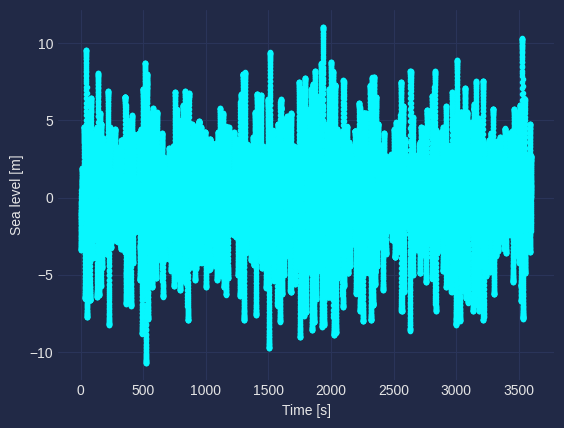

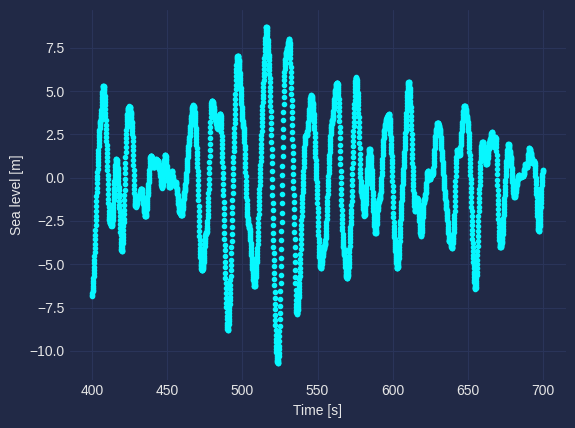

In [7]:
# We plot the sea level as a function of the time
fig, ax = plt.subplots()

ax.plot(t,seaSurface,'.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Sea level [m]')

#This looks a bit messy!

# Let's consider a small time window of 5 minutes = 300 s.
fig, ax = plt.subplots()

ax.plot(t[(t>400) & (t<700)], seaSurface[(t>400) & (t<700)],'.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Sea level [m]')


We see that the system is subject to rather strong moments. We also see that it is useful to slice an array to a specific time window.

It may also later become useful to normalize two arrays to make it easier to compare them. Therefore, we define the following two functions:

In [8]:
def sliceArray(array, t, mintime, maxtime):
    # To slice in time we select only datapoints satisfying the greater than 
    # and smaller than requirements.
    slicedArray = array[(t>mintime) & (t<= maxtime)]
    return slicedArray

def normalizeArray(array):
    # To normalize an array, we subtract the minimum value 
    # and divide by the maximum value
    normalizedArray = (array-min(array))/max(array-min(array))
    return normalizedArray

# Your tasks
**Note:** Please continue this notebook and do all the following tasks within that notebook. Please comment appropriately all code-blocks and perform the necessary discussions of your results in Markup cells. All plots must have appropriate axes-labels and a title! Your project submission will consist of the modified notebook.

0. From looking at the figure where the different parameters are shown, which quantities would you expect to be correlated? (0 points, but give it a thought!)


1. Use the ```numpy``` functionality to find the maximum and minimum values and answer the following questions: How far above and below the normal sea level does the sea get? How far are these events from each other in time?  What is the maximal wind speed in km/h? What is the biggest moment experienced by the tower - do you think the sign matters in this case?

**Hint** you can use ```np.argmax``` and ```np.argmin``` or ```np.where``` to answer the time-difference question.



Wind Speed and Nacelle Acceleration should most likely be correlated as higher windspeeds mean that higher force is exerted on Nacelle, Netwons Second Law F= ma. This should also be the case
with the Nacelle Acceleration and Tower Moment. 

In [9]:
# Your solution here

#np.max/np.min give us maximum/minimum value of a numpy array
print('Farthest above normal sea level:', np.max(seaSurface))
print('Farthest below normal sea level:', np.min(seaSurface))

print('\n')

#np.argmax / np.argmin give  index where an array is maximum / minimum.  np.abs ensures this value is non-negative
print('Time difference is:', np.abs(seaSurface[np.argmax(seaSurface)] -seaSurface[np.argmin(seaSurface)] ), 'seconds\n')

#3.6 is the factor to convert from m/s to km/h
print('Maximum Wind Speed is:',np.max(windSpeed) * 3.6, 'Km / Hour\n' )

print('Maximum Tower Moment is:',np.max(towerMom), 'KN m. The sign matters in this case as it informs which direction the Moment occurs \n')

Farthest above normal sea level: 11.05
Farthest below normal sea level: -10.69


Time difference is: 21.740000000000002 seconds

Maximum Wind Speed is: 253.116 Km / Hour

Maximum Tower Moment is: -1645.26 KN m. The sign matters in this case as it informs which direction the Moment occurs 




2. Normalize and compare the different datasets to each other by plotting them together for a time window of your choice. It can be useful to separate the different plots with an offset as here:

```
plt.plot(t,windSpeedNorm+0)
plt.plot(t,seaSurfaceNorm+1)
```

Does any of the datasets seem completely uncorrelated with the others? 

We observe that the acceleration of the nacelle and the tower moment are correlated. Why do you think this is the case? How do you think it scales? 
    
**Hint:** Which of Newton's laws would describe such a correlation?



F= ma 
$\newline$
Newton's 2nd law

I am able to plot all the parameters directly with an offset and compare them since we've normalized them. I plot between times 500 and 1000 because it is large enough to have sufficient data points yet small enough that isn't too noisy and full of errors, for us to still be able to compare the graphs. I tried plotting for other time frames as well and got similar results

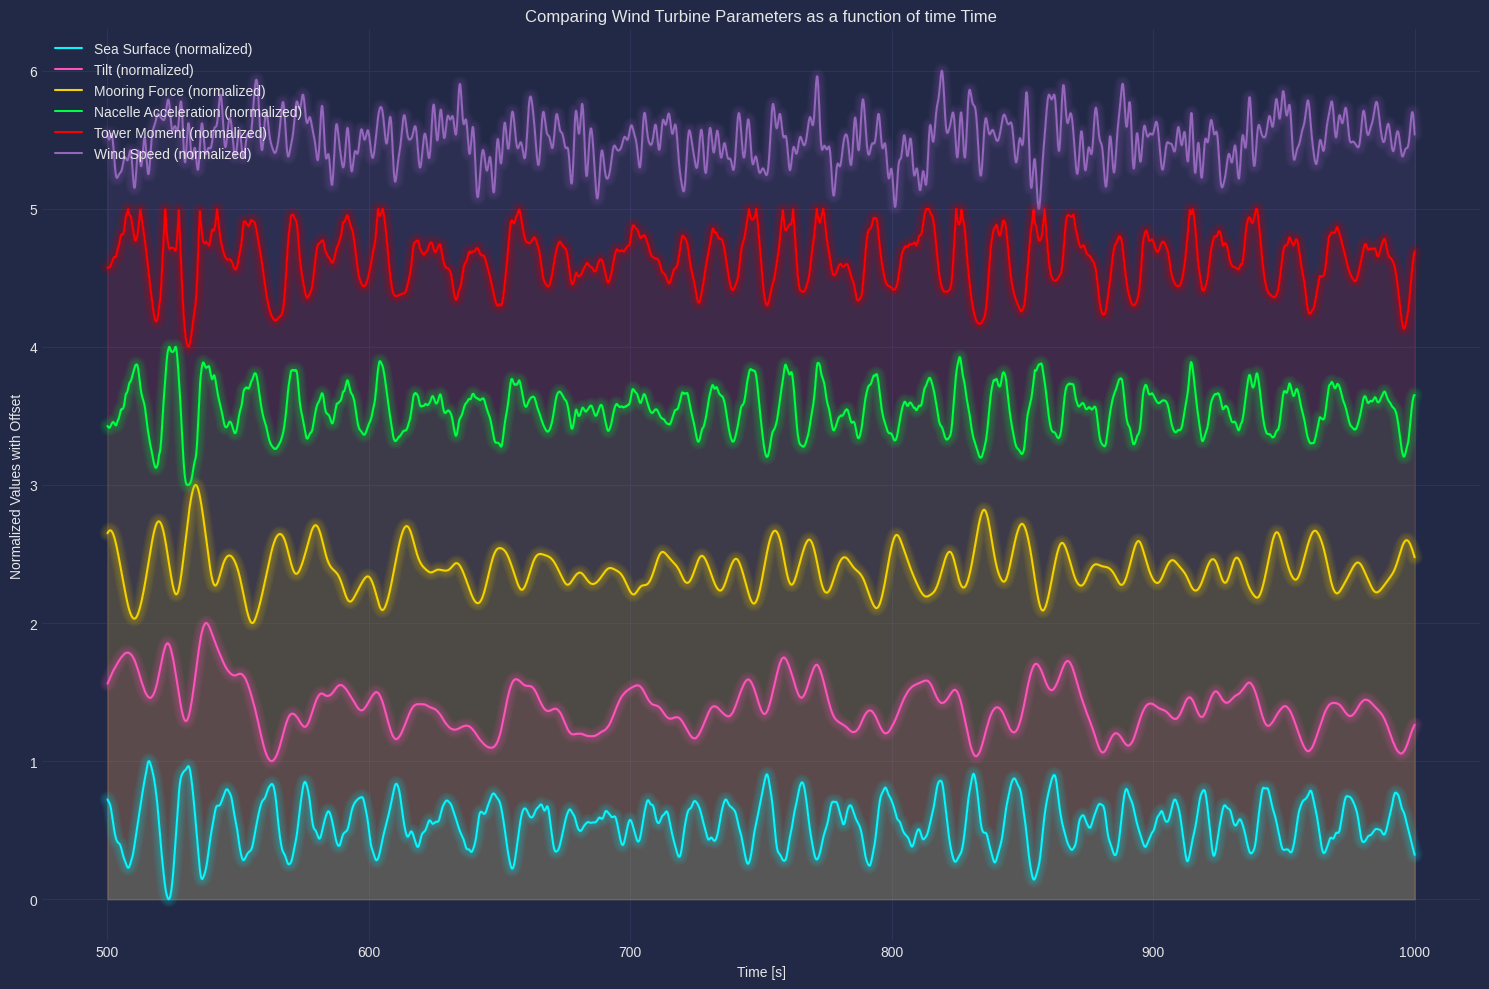

In [10]:
# Set the minimum and maximum time over which to observe the values
min_time = 500
max_time = 1000

# Normalize and slice arrays within the specified time range
time_sliced = sliceArray(t, t, min_time, max_time)

#Set the Parameters we're going to plot
parameters = {
    'Sea Surface': normalizeArray(sliceArray(seaSurface, t, min_time, max_time)),
    'Tilt': normalizeArray(sliceArray(tilt, t, min_time, max_time)),
    'Mooring Force': normalizeArray(sliceArray(mooring, t, min_time, max_time)),
    'Nacelle Acceleration': normalizeArray(sliceArray(nacAcc, t, min_time, max_time)),
    'Tower Moment': normalizeArray(sliceArray(towerMom, t, min_time, max_time)),
    'Wind Speed': normalizeArray(sliceArray(windSpeed, t, min_time, max_time))
}

# Prepare to plot
plt.style.use("cyberpunk")
#15 by 10 inches size of the figure
fig, ax = plt.subplots(figsize=(15, 10))

# Offset to view plots clearly
offsets = {
    'Sea Surface': 0,
    'Tilt': 1,
    'Mooring Force': 2,
    'Nacelle Acceleration': 3,
    'Tower Moment': 4,
    'Wind Speed': 5
}

# Plot each parameter with an offset
for param, data in parameters.items():
    ax.plot(time_sliced, data + offsets[param], label=f'{param} (normalized)')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Normalized Values with Offset')
ax.set_title('Comparing Wind Turbine Parameters as a function of time Time')
#Clearly indicates which color corresponds to which variable, set it to be on the top left
ax.legend(loc='upper left')
mplcyberpunk.add_glow_effects()

#adjusts subplot parameters so that the subplot(s) fits in to the figure area
plt.tight_layout()
plt.show()

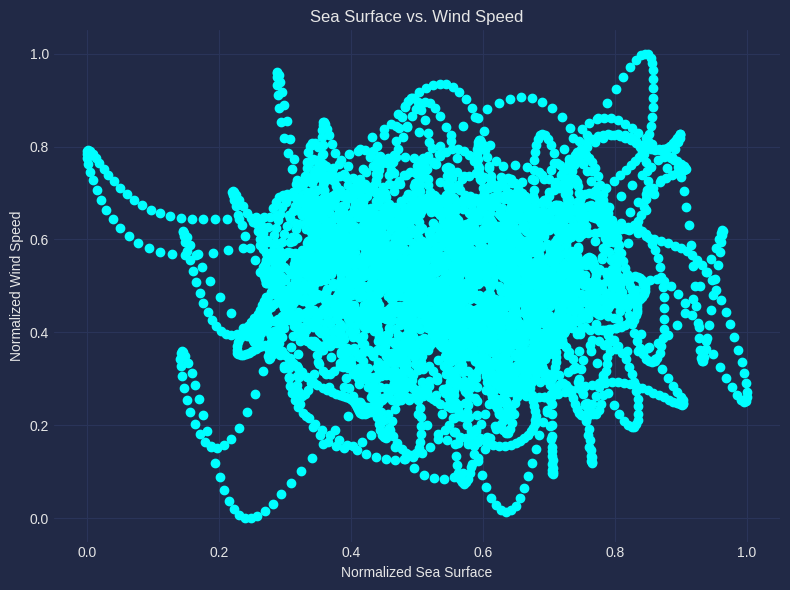

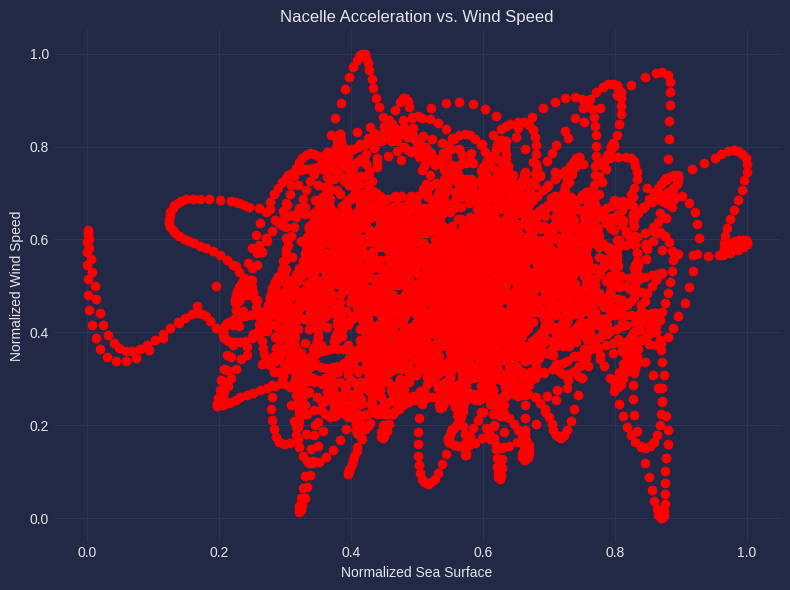

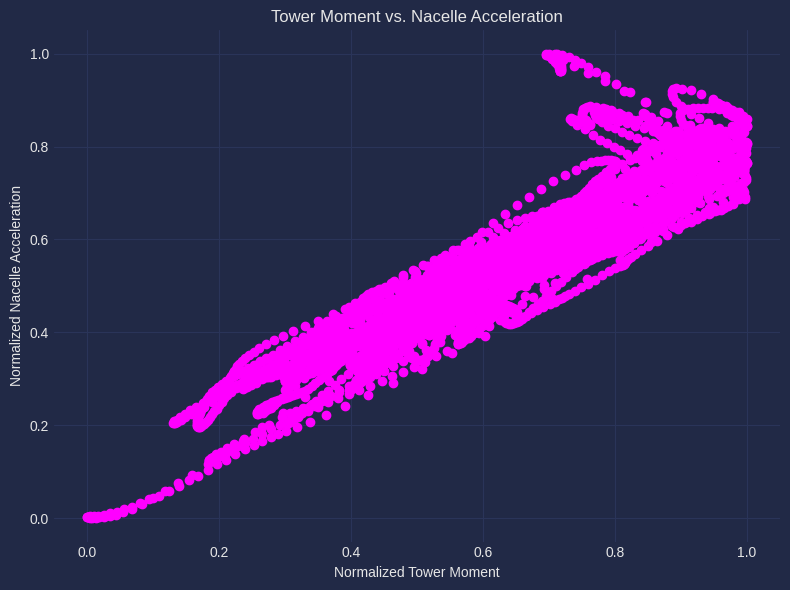

In [11]:

# Normalize and slice arrays within the specified time range
seaSurface_sliced = normalizeArray(sliceArray(seaSurface, t, min_time, max_time))
windSpeed_sliced = normalizeArray(sliceArray(windSpeed, t, min_time, max_time))
nacAcc_sliced = normalizeArray(sliceArray(nacAcc, t, min_time, max_time))
towerMom_sliced = normalizeArray(sliceArray(towerMom, t, min_time, max_time))

# Plot Sea Surface vs. Wind Speed
plt.style.use("cyberpunk")
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(seaSurface_sliced, windSpeed_sliced, color='cyan')
ax.set_xlabel('Normalized Sea Surface')
ax.set_ylabel('Normalized Wind Speed')
ax.set_title('Sea Surface vs. Wind Speed')

plt.tight_layout()
plt.show()

# Plot Nacelle Acceleration vs. Wind Speed
plt.style.use("cyberpunk")
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(nacAcc_sliced, windSpeed_sliced, color='red')
ax.set_xlabel('Normalized Sea Surface')
ax.set_ylabel('Normalized Wind Speed')
ax.set_title('Nacelle Acceleration vs. Wind Speed')

plt.tight_layout()
plt.show()

# Plot Tower Moment vs. Nacelle Acceleration
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(towerMom_sliced, nacAcc_sliced, color='magenta')
ax.set_xlabel('Normalized Tower Moment')
ax.set_ylabel('Normalized Nacelle Acceleration')
ax.set_title('Tower Moment vs. Nacelle Acceleration')
plt.tight_layout()
plt.show()

We can clearly see that Tower Moment and Nacelle Acceleration are positively correlated as we would expect whereas the Sea Surface Height and Wind Speed don't depend on each other which is why we don't see a linear plot. Instead we see points scattered everywhere. When the nacelle experiences accelerations , these movements can induce oscillatory loads on the tower. These loads result in larger bending moments (tower moments). This is why they're correlated
Surprisingly, Nacelle Acceleration & Windspeed are uncorrelated.

In [12]:
# This is the same function, but extended to also take into account a situation where no local minimum is present 



3. We will test whether the datasets are correlated by calculating the correlation between them. 

    The correlation between two parameters can be estimated with the correlation coefficient, which depends on the covariance. 
    The covariance is defined as
    
    \begin{align}
    \mathrm{cov}(X_1, X_2) = \left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle
    \end{align}
    
    where we use $\langle \cdots \rangle$ as the expectation value, such that $\langle X_1 \rangle$ is the mean of the variable $X_1$. Note how the covariance resembles to the variance $\mathrm{var}(X_1) = \left\langle(X_1-\langle X_1 \rangle)^2 \right\rangle$.
    
    The covariance between $X_1$ and $X_2$ describes to how large a degree the variation of $X_1$ and $X_2$ is related. To compare covariances it is sensible to normalize with the variances of the two parameters. This gives us the correlation coefficient, which is defined as 
        
    \begin{align}
    \mathrm{corr}(X_1, X_2) = \frac{\left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle}{\sqrt{\mathrm{var}(X_1)}\cdot \sqrt{\mathrm{var}(X_2)}}
    \end{align}
    
    A correlation parameter close to 1 means that the variation of $X_1$ and $X_2$ is strongly correlated. A value close to zero means that the parameters are not varying together. A value close to -1 means that they are anti-correlated: If one goes up, the other one goes down, so to say.

    Calculate the correlation parameter and find
    - the parameters which are most and least related to the sea surface level.
    - the parameters which are most and least related to tower moment.
    
    Are you surprised by the result?

In [13]:
# Your solution here

import numpy as np

# Function to calculate correlation parameter. 
def correlation_parameter(x, y):
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Compute the numerator as the sum of products of deviations from the means
    numerator = np.sum((x - mean_x) * (y - mean_y))
    
    # Compute the denominator as the product of the standard deviations and multiply it with length of the array x and y
    denominator = np.std(x) * np.std(y) * len(x)
    
    # Compute the correlation parameter 
    correlation = numerator / denominator
    return correlation

# Calculate correlation with Sea Surface Level
corr_seaSurface_tilt = correlation_parameter(seaSurface, tilt)
corr_seaSurface_mooring = correlation_parameter(seaSurface, mooring)
corr_seaSurface_nacAcc = correlation_parameter(seaSurface, nacAcc)
corr_seaSurface_towerMom = correlation_parameter(seaSurface, towerMom)
corr_seaSurface_windSpeed = correlation_parameter(seaSurface, windSpeed)

# Calculate correlation with Tower Moment
corr_towerMom_tilt = correlation_parameter(towerMom, tilt)
corr_towerMom_mooring = correlation_parameter(towerMom, mooring)
corr_towerMom_nacAcc = correlation_parameter(towerMom, nacAcc)
corr_towerMom_seaSurface = correlation_parameter(towerMom, seaSurface)
corr_towerMom_windSpeed = correlation_parameter(towerMom, windSpeed)

# Print correlations for Sea Surface
print("Correlations with Sea Surface Level:")
print("Tilt:", corr_seaSurface_tilt)
print("Mooring:", corr_seaSurface_mooring)
print("Nacelle Acceleration:", corr_seaSurface_nacAcc)
print("Tower Moment:", corr_seaSurface_towerMom)
print("Wind Speed:", corr_seaSurface_windSpeed)

print("\n") #Print a new line for clarity

# Print correlations for Tower Moment
print("Correlations with Tower Moment:")
print("Tilt:", corr_towerMom_tilt)
print("Mooring:", corr_towerMom_mooring)
print("Nacelle Acceleration:", corr_towerMom_nacAcc)
print("Sea Surface:", corr_towerMom_seaSurface)
print("Wind Speed:", corr_towerMom_windSpeed)


Correlations with Sea Surface Level:
Tilt: -0.3961419648815372
Mooring: 0.13465198247473426
Nacelle Acceleration: -0.6212418534160657
Tower Moment: -0.538509185475405
Wind Speed: 0.02581689806421358


Correlations with Tower Moment:
Tilt: 0.6099168579631556
Mooring: -0.6455875936823035
Nacelle Acceleration: 0.9047304290585231
Sea Surface: -0.538509185475405
Wind Speed: -0.02184913031786073


These resultants are very surprising, especially Sea Surface and Tilt as when the sea surface level increases, I would expect higher wave action to cause more the tilt of the turbine, and have a higher magnitude of correlation

4. In exercise 1 we found the minima and maxima of the sea height and we investigated how far apart the deepest through and the highest peak were.
    In stability analysis the maximal values are not always of immediate interest, because these values may only appear very far apart in time. Instead it may be more interesting to consider how many small cycles some parameter performs. 

- For the mooring force, find all the local minima and maxima for the mooring force time series between t = 0 s and t = 2000 s. You will see methods for doing this in the lecture review.
- Make a histogram of the difference in force between each minima and maxima. Remember to do this on both sides of a peak. The figures below show the first four differences to calculate for the interval from 400 s to 700 s, and a histogram with 10 bins of the forces. Use the histogram to check your method and create a histogram for the mooring force time series between t = 0 s and t = 2000 s.
- Compare the histogram with the difference between the global maximum and global minimum and comment.



<img src="figs/mooringForceMaxMinHistogram.png" width=800px/>



The total number of local maxima are 248
The total number of local minima are 247


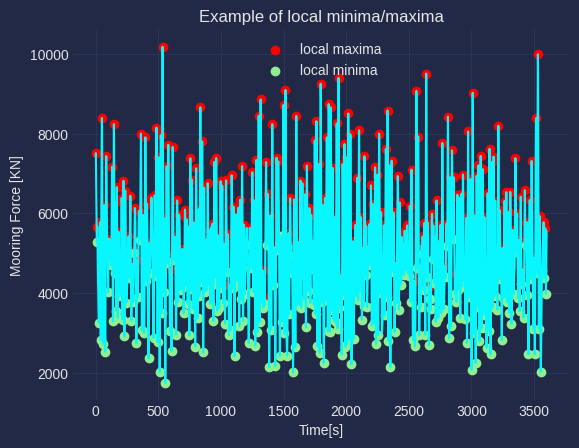

In [14]:
# Your solution here
#Reusing some code from the lecture

# calculate the extrema function
extrema = np.diff(np.sign(np.diff(mooring)))

# extract the local minima/maxima using np.where
maxima = np.where(extrema == -2)[0] + 1  # don't forget the shift
minima = np.where(extrema == 2)[0]  + 1  # don't forget the shift

# calculate the points with masking
maxs_x = t[maxima]
maxs_y = mooring[maxima]
mins_x = t[minima]
mins_y = mooring[minima]

# plot the function and local extramas
fig, ax = plt.subplots()
ax.plot(t, mooring)
ax.scatter(maxs_x, maxs_y, marker='o', color='red', label='local maxima')
ax.scatter(mins_x, mins_y, marker='o', color='lightgreen', label='local minima')
ax.legend()
ax.set_title('Example of local minima/maxima')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Mooring Force [KN]')

print('The total number of local maxima are',len(maxs_y))
print('The total number of local minima are',len(mins_y))


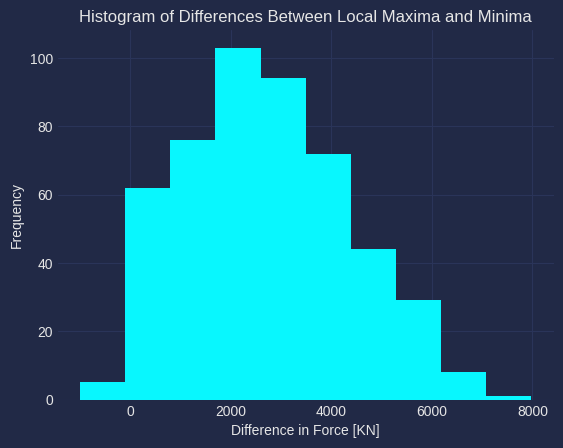

Difference between global maximum and minimum: 8439.46 KN


In [15]:

# Initialize the list to store the differences between local maxima and minima
differences = []


for i in range(len(maxima)):
    if i > 0:
        # Difference between current maximum and previous minimum
        differences.append(mooring[maxima[i]] - mooring[minima[i-1]])
    if i < len(minima):
        # Difference between current maximum and next minimum
        differences.append(mooring[maxima[i]] - mooring[minima[i]])

# Convert list to numpy array
differences = np.array(differences)

# Plotting the histogram
fig, ax = plt.subplots()
ax.hist(differences, bins=10)
ax.set_xlabel('Difference in Force [KN]')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Differences Between Local Maxima and Minima')

# Display the plot
plt.show()

# Calculate and print the difference between the global maximum and minimum
global_diff = np.max(mooring) - np.min(mooring)
print(f"Difference between global maximum and minimum: {global_diff} KN")



The local minima/maxima differences seem to be apprxomiately normally distributed upon first inspection with a mean around 2800, around 1/3 of the maximum difference and the plot seems to be slightly skewed in the left, indiciating an additional of a normal distribution with another distribution. Additionally, there seem to be few points with a difference value similar to the difference between global minimum and maximum

5. We would like to dimension the tower on the basis of the maximum tower bottom moment. 
    The tower is a hollow steel cylinder with an outer diameter of 10 m and a wall thickness T. 

    The bending stress in a hollow cylinder is
    \begin{align}
    s = \frac{M_b}{W}
    \end{align}
    where $s$ is the stress, $M_b$ is the maximum bending moment, and $W$ is the moment of resistance. 
    The bending stress needs to be lower than the maximum allowable stress. For the common steel type, FE 510, the maximum allowable stress is 345 MPa. 

    The moment of resistance for a hollow cylinder is
    \begin{align}
    W = \frac{\pi}{64}\frac{D_o^4 – D_i^4}{D_o}
    \end{align}
    where $D_o$ is the outer diameter and $D_i$ is the inner diameter. 

    Write a function that returns the minimum allowable wall thickness T of the tower for a given maximum tower moment and calculate for the maximum tower moment recorded during the one hour simulation period.
    Does the result surprise you?
    

In [16]:
# Your solution here

def wall_thickness(TowerMom, d_outer=10.0, max_stress=345e6):
    """
    Calculate the minimum wall thickness required for a given maximum tower moment.
    
    Parameters:
    - TowerMom: Numpy array of tower moments in N*m
    - d_outer: Outer diameter of the cylinder in meters
    - max_stress: Maximum allowable stress in Pascals
    
    Returns:
    - Minimum wall thickness in meters
    """
    # Calculate maximum bending moment
    max_moment = np.max(TowerMom)

    # Start with a guess for T 
    T = 0.0001  # start with a very small thickness to ensure we start with high stress

    # Define the increment for wall thickness adjustments
    increment = 0.001  

    # Initialize variables for loop
    d_inner = d_outer - 2 * T
    W = (np.pi / 64) * ((d_outer**4 - d_inner**4) / d_outer)
    stress = max_moment / W

    # Increase T until the stress drops below the maximum allowable stress
    while stress > max_stress:
        T += increment
        d_inner = d_outer - 2 * T
        W = (np.pi / 64) * ((d_outer**4 - d_inner**4) / d_outer)
        stress = max_moment / W

        # Fail-safe to prevent runaway increments if calculations go wrong
        if T >= (d_outer / 2):
            raise ValueError("Calculated wall thickness exceeds half the outer diameter, which is physically impossible.")

    return T

# Assuming towerMom is a numpy array with moment data
min_thickness = wall_thickness(towerMom)
print(f"The minimum wall thickness required is {min_thickness:.4f} meters.")

The minimum wall thickness required is 0.0001 meters.


## Additional information - not related to programming per se

For more information on floating wind turbines, see

https://en.wikipedia.org/wiki/Floating_wind_turbine

This promotional video shows the installation of a 3.6 MW demonstration turbine on a floating foundation https://dock90.com/tetraspar/

The data used in this project was calculated in https://www.orcina.com/orcaflex/ and kindly shared by the TetraSpar Demo team.